<a href="https://colab.research.google.com/github/Riccardolotorto/MachineLearning_Python/blob/main/classificazione.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Machine Learning Python/Machine Learning/data/poker-hand-testing.data', header = None)

In [4]:
df

,0,1,2,3,4,5,6,7,8,9,10
0,1,1,1,13,2,4,2,3,1,12,0
1,3,12,3,2,3,11,4,5,2,5,1
2,1,9,4,6,1,4,3,2,3,9,1
3,1,4,3,13,2,13,2,1,3,6,1
4,3,10,2,7,1,2,2,11,4,9,0
...,...,...,...,...,...,...,...,...,...,...,...
999995,3,1,1,12,2,9,4,9,2,6,1
999996,3,3,4,5,2,7,1,4,4,3,1
999997,1,11,4,7,3,9,1,13,2,7,1
999998,3,11,1,8,1,1,3,13,2,8,1


in questo dobbiamo utilizzare la classificazione

In [5]:
df = df.dropna(how='any').dropna(how='any', axis=1)   #controllo se ci sono dati nulli
df

,0,1,2,3,4,5,6,7,8,9,10
0,1,1,1,13,2,4,2,3,1,12,0
1,3,12,3,2,3,11,4,5,2,5,1
2,1,9,4,6,1,4,3,2,3,9,1
3,1,4,3,13,2,13,2,1,3,6,1
4,3,10,2,7,1,2,2,11,4,9,0
...,...,...,...,...,...,...,...,...,...,...,...
999995,3,1,1,12,2,9,4,9,2,6,1
999996,3,3,4,5,2,7,1,4,4,3,1
999997,1,11,4,7,3,9,1,13,2,7,1
999998,3,11,1,8,1,1,3,13,2,8,1


In [6]:
import numpy as np
dfnp = df.to_numpy()
dfnp

array([[ 1,  1,  1, ...,  1, 12,  0],
       [ 3, 12,  3, ...,  2,  5,  1],
       [ 1,  9,  4, ...,  3,  9,  1],
       ...,
       [ 1, 11,  4, ...,  2,  7,  1],
       [ 3, 11,  1, ...,  2,  8,  1],
       [ 2,  5,  2, ...,  3,  3,  2]])

In [7]:
x=dfnp[:,:-1] # prendiamo tutti i dati tranne l'ultima colonna -> variabili indipendenti, osservazioni
y=dfnp[:,-1] #prendiamo solo l'ultima colonna -> variabile dipendente

In [8]:
print(x)
print(y)
import collections
collections.Counter(y)

[[ 1  1  1 ...  3  1 12]
 [ 3 12  3 ...  5  2  5]
 [ 1  9  4 ...  2  3  9]
 ...
 [ 1 11  4 ... 13  2  7]
 [ 3 11  1 ... 13  2  8]
 [ 2  5  2 ...  3  3  3]]
[0 1 1 ... 1 1 2]


Counter({0: 501209,
         1: 422498,
         2: 47622,
         3: 21121,
         5: 1996,
         4: 3885,
         6: 1424,
         7: 230,
         8: 12,
         9: 3})

In [9]:
print(x[:10])
print(f'y = {y[:10]}')

[[ 1  1  1 13  2  4  2  3  1 12]
 [ 3 12  3  2  3 11  4  5  2  5]
 [ 1  9  4  6  1  4  3  2  3  9]
 [ 1  4  3 13  2 13  2  1  3  6]
 [ 3 10  2  7  1  2  2 11  4  9]
 [ 1  3  4  5  3  4  1 12  4  6]
 [ 2  6  4 11  2  3  4  9  1  7]
 [ 3  2  4  9  3  7  4  3  4  5]
 [ 4  4  3 13  1  8  3  9  3 10]
 [ 1  9  3  8  4  4  1  7  3  5]]
y = [0 1 1 1 0 0 0 0 0 0]


In [10]:
from sklearn.model_selection import train_test_split # type: ignore # suddivide le osservazioni nei due insiemi

X_train, X_test, y_train, y_test = train_test_split(x, y,
                                                    test_size = 0.33, # by default is 75%-25%
                                                    # shuffle is set True by default,
                                                    stratify = y, # per mantenere le proporzioni che ci sono nei dati di partenza
                                                    random_state = 123) # fix random seed for replicability: dati tutti uguali

In [11]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((670000, 10), (670000,), (330000, 10), (330000,))

In [12]:
print(X_train[:10])
print(f'y_train = {y_train[:10]}')

[[ 4 10  2  5  4  2  3  6  2  7]
 [ 4  2  3  2  1  9  3  9  1  2]
 [ 2  3  2  4  3  1  1  7  4  2]
 [ 2  4  3  3  2  9  2 13  4  7]
 [ 3  4  3  3  1  4  2  5  4  8]
 [ 2 13  3  6  1  4  3  3  2  2]
 [ 4  3  2  8  2  2  3  9  2  6]
 [ 2  4  3 12  2 13  1  3  1  5]
 [ 3 10  2  8  4  5  2  6  1  7]
 [ 1 11  2  4  2  6  3  7  4 13]]
y_train = [0 6 0 0 1 0 0 0 0 0]


In [13]:
# importiamo il metodo che vogliamo utilizzara (tra i tanti disponibili...)
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=3) # impostiamo l'unico parametro (il numero di vicini)

In [14]:
neigh.fit(X_train, y_train) # "alleniamo" il metodo con i dati del training set

KNeighborsClassifier(n_neighbors=3)

In [15]:
predict = neigh.predict(X_test) # proviamo a fare una previsione sui dati del test set

In [16]:
print(f'dati predetti dal metodo =                {predict[:10]}') # dati predetti dal metodo
print(f'dati reali presenti nel dataset di test = {y_test[:10]}') # dati effettivi presenti nel test set

dati predetti dal metodo =                [0 1 1 0 0 1 0 0 3 0]
dati reali presenti nel dataset di test = [0 1 2 0 0 0 0 1 2 0]


In [18]:
!pip install mlxtend

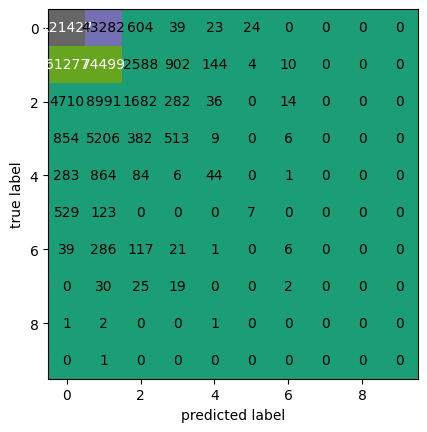

In [19]:
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

plot_confusion_matrix(confusion_matrix(y_test, predict), cmap=plt.cm.Dark2)
plt.show()

In [20]:
print(classification_report(y_test, predict))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.64      0.73      0.69    165399
           1       0.56      0.53      0.55    139424
           2       0.31      0.11      0.16     15715
           3       0.29      0.07      0.12      6970
           4       0.17      0.03      0.06      1282
           5       0.20      0.01      0.02       659
           6       0.15      0.01      0.02       470
           7       0.00      0.00      0.00        76
           8       0.00      0.00      0.00         4
           9       0.00      0.00      0.00         1

    accuracy                           0.60    330000
   macro avg       0.23      0.15      0.16    330000
weighted avg       0.58      0.60      0.58    330000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
